In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows',8)
%matplotlib inline
path='/dls/science/users/spc93/data/MoS2/'

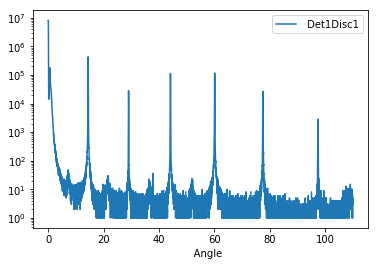

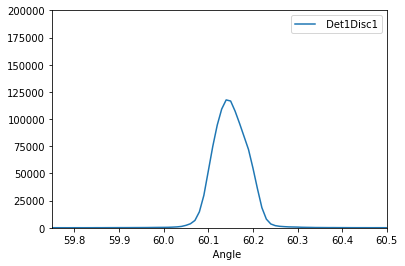

In [2]:
file='MoS2_I16_MoS2_Point detector.txt'
d=pd.read_csv((path+file),header=250,skip_blank_lines=False)
d.plot(x='     Angle',y=' Det1Disc1', logy=True)
d.plot(x='     Angle',y=' Det1Disc1', xlim=[59.75,60.5], ylim=[0,200000])

In [3]:
d

,Angle,Det1Disc1,Unnamed: 2
0,0.00,8225090.0,NaN
1,0.01,8259520.0,NaN
2,0.02,7869910.0,NaN
3,0.03,6882650.0,NaN
...,...,...,...
10997,109.97,3.0,NaN
10998,109.98,5.0,NaN
10999,109.99,5.0,NaN
11000,110.00,3.0,NaN


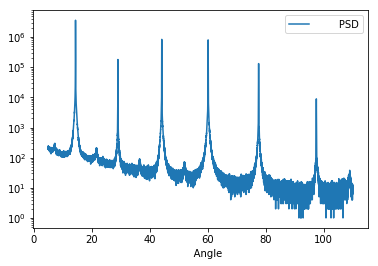

In [4]:
file='MoS2_I16_MoS2_Vantec.txt'
d=pd.read_csv((path+file),header=221,skip_blank_lines=False)
d.plot(x='     Angle',y='       PSD', logy=True)
#d.plot(x='     Angle',y=' Det1Disc1', xlim=[59.75,60.5], ylim=[0,200000])

In [5]:
c=12.302; lam=1.5406; refs=np.arange(1,6); angles=2*np.arcsin(lam/2./c*refs)*180/np.pi

In [6]:
d['l']=pd.Series(2.*c/lam*np.sin(d['     Angle']/2.*np.pi/180))

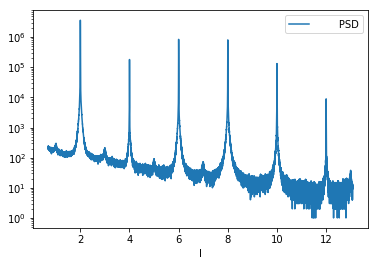

In [7]:
d.plot(x='l',y='       PSD', logy=True)

In [8]:
d['l']

0         0.696619
1         0.697379
2         0.698140
3         0.698900
           ...    
19223    13.080988
19224    13.081387
19225    13.081867
19226    13.082267
Name: l, Length: 19227, dtype: float64

In [9]:
d

,Angle,PSD,Unnamed: 2,l
0,5.00000,241.0,NaN,0.696619
1,5.00546,226.0,NaN,0.697379
2,5.01092,234.0,NaN,0.698140
3,5.01638,191.0,NaN,0.698900
...,...,...,...,...
19223,109.98500,6.0,NaN,13.080988
19224,109.99000,9.0,NaN,13.081387
19225,109.99600,13.0,NaN,13.081867
19226,110.00100,10.0,NaN,13.082267


In [10]:
import sys
sys.path.append('/dls_sw/i16/software/python/crystal/')

import Crystal as Cr
cifpath='/home/spc93/spc_cifs/'
mc = Cr.Crystal()
mc.load_cif(cifpath+'MoS2_icsd_49801_cifbib.cif','49801-ICSD')

energy=12.4/1.54
refs=mc.reflection_list(energy)

#(1,0,l)
#look at 10l 20l 11l
shortlist=[ref for ref in refs if ref[0][0]==0 and ref[0][1]==0]
print; print '(h,k,l)\t\ttth\tIrel'; print '-------\t\t---\t---'
for ref in shortlist[0:25]:
    print ref[0],'\t%.2f\t%.2f' % (ref[4], ref[2])


#refs=mc.reflection_list(energy)
#refs=[ref for ref in refs if ref[0][0]==ref[0][1]==ref[0][2]] #filter refs hhh
print; print '(h,k,l)\t\ttth\tIrel\td\tE(tth=90)'; print '-------\t\t---\t---'
for ref in shortlist[0:25]:
    d=ref[5]
    E90=12.4/np.sqrt(2)/d
    print ref[0],'\t%.2f\t%.4g\t%.3f\t%.3f' % (ref[4], ref[2], d, E90)


#    (h,k,l)           Intensity           Norm. Int.        Amplitude                               TwoTheta (deg)                d_spacing (A)       
1    (0, 0, 2)         5828.92727755       70.9761027269     (-76.3474117279+0j)                     14.3902010581                 6.147               
2    (0, 0, 4)         477.57027121        5.8151483137      (21.8533812306+0j)                      29.0138233105                 3.0735              
3    (1, 0, 0)         3279.72137362       39.9356228076     (-57.2688516876+0j)                     32.6793242057                 2.73664027596       
4    (1, 0, 1)         977.958191777       11.9081363992     (-31.2723230953+0j)                     33.5024626442                 2.67125914202       
5    (1, 0, 2)         1028.08643883       12.5185244591     (32.0637870319+0j)                      35.8716814179                 2.50007256324       
6    (1, 0, 3)         6987.52281695       85.0837750494     (83.5914039657+0j)         